# 2CS501 Machine Learning
# Innovative Assignment
# Title: Music Genre Classification and Recommendation System
# Roll No: 21BCE261, 21BCE263, 21BCE279

# Purpose:
1. We want to understand what is an Audio file. What features we can visualize on this kind of data.
2. EDA. Exploratry Data Analysis
3. Genres Classification on the 3 seconds CSV file (trying multiple models and identify which has the best accuracy)
4. A recommender system: given a song, give me top X songs most similar.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [8]:
import os
general_path = 'gtzan-dataset-music-genre-classification/Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


Sound: sequence of vibrations in varying pressure strengths (y) <br>
The sample rate (sr): is the number of samples of audio carried per second, measured in Hz or kHz

In [9]:
#import 1 song

y, sr = librosa.load(f'{general_path}/genres_original/hiphop/hiphop.00079.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

print('Check Len of Audio:', 661504/sr)

y: [-0.01690674 -0.01690674 -0.02212524 ...  0.14733887  0.28033447
  0.29586792] 

y shape: (661504,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.00018140589569


In [10]:
#trim song

audio_file, _ = librosa.effects.trim(y)

print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [-0.01690674 -0.01690674 -0.02212524 ...  0.14733887  0.28033447
  0.29586792] 

Audio File shape: (661504,)


# Sound Waves of Song

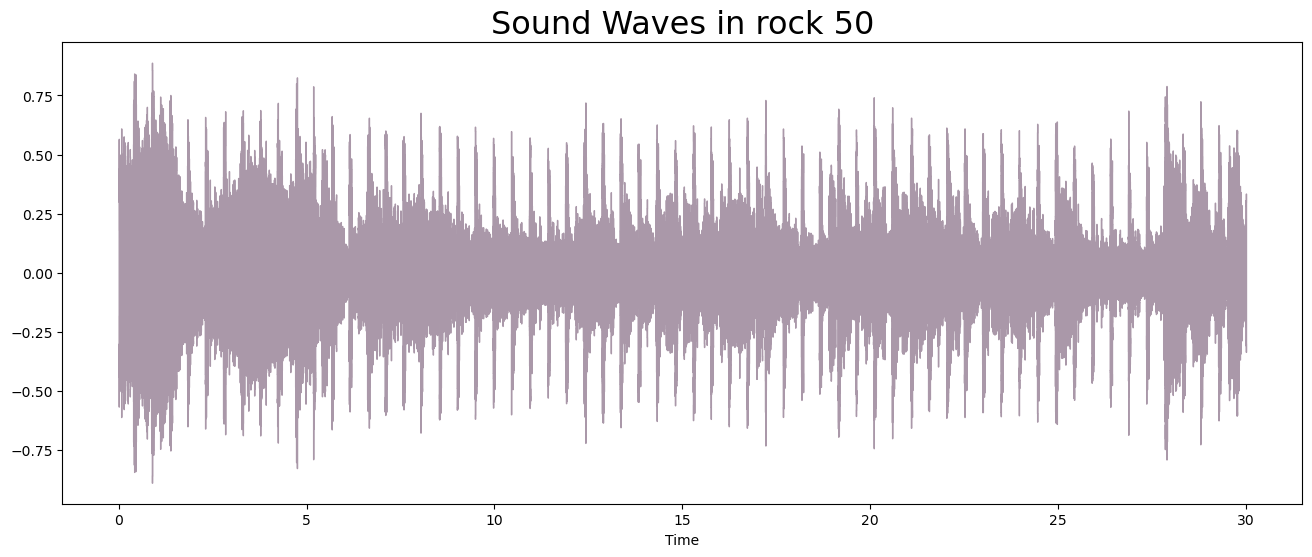

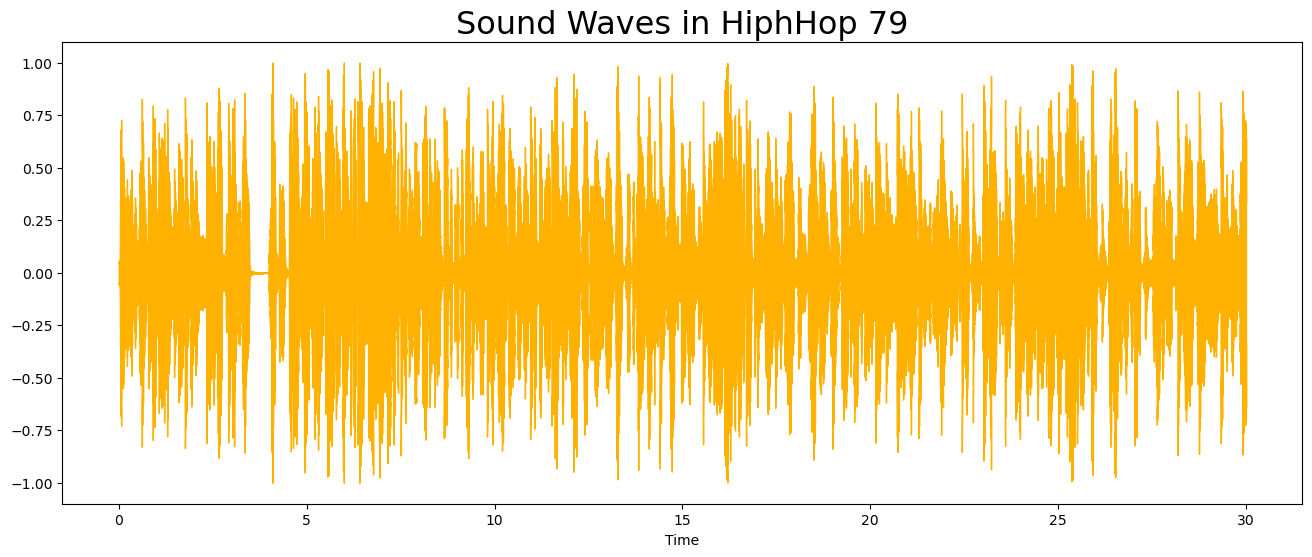

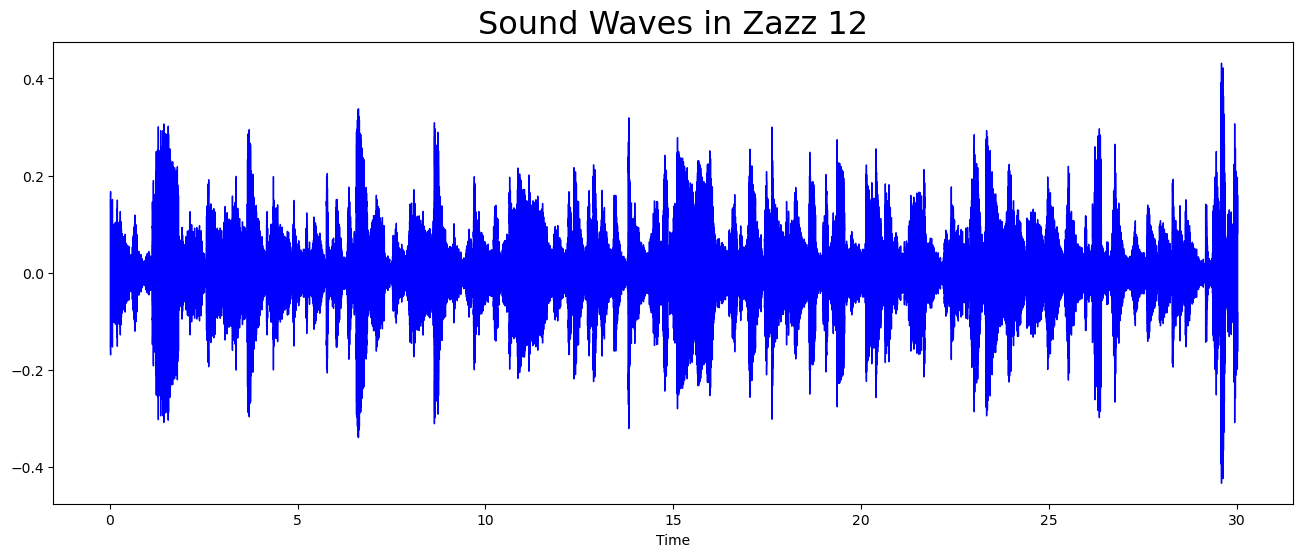

In [38]:
y1, sr1 = librosa.load(f'{general_path}/genres_original/rock/rock.00050.wav')
audio_file1, _ = librosa.effects.trim(y1)
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file1, sr = sr1, color = "#AA98A9");
plt.title("Sound Waves in rock 50", fontsize = 23);


plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#FFB100");
plt.title("Sound Waves in HiphHop 79", fontsize = 23);

y2, sr2 = librosa.load(f'{general_path}/genres_original/jazz/jazz.00012.wav')
audio_file2, _ = librosa.effects.trim(y2)
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file2, sr = sr2, color = "#0000FF");
plt.title("Sound Waves in Zazz 12", fontsize = 23);

# Fourier Transform

Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies <br>
Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

Shape of D object: (1025, 1293)


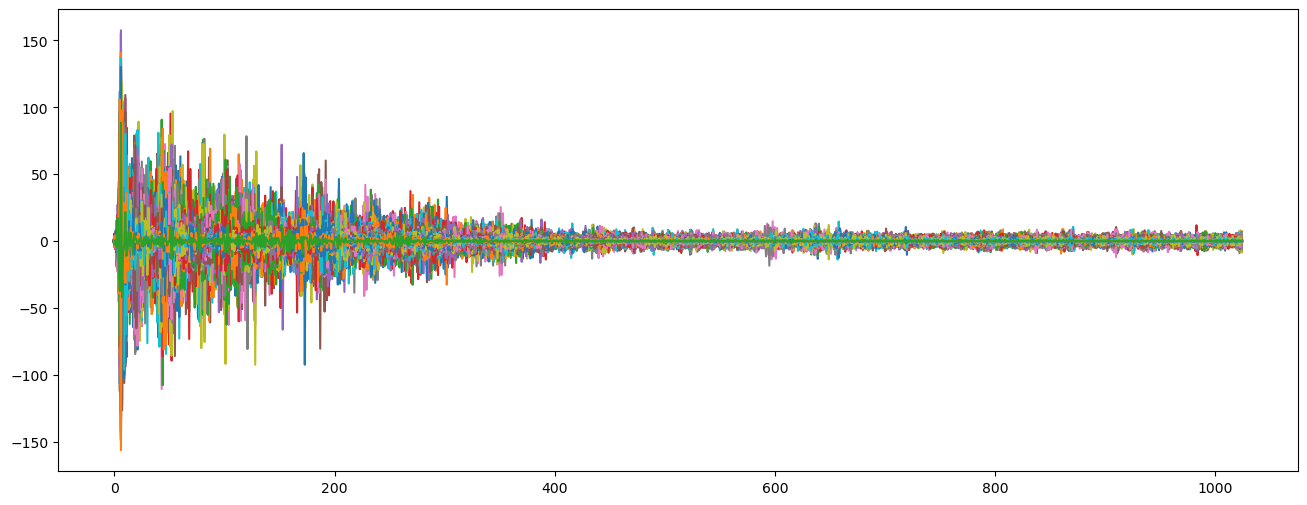

In [61]:
# Represent FFT window size into log

D = (librosa.stft(audio_file, n_fft = 2048, hop_length = 512))
print('Shape of D object:', np.shape(D))
plt.figure(figsize = (16, 6))
plt.plot(D);

# The Spectrogram


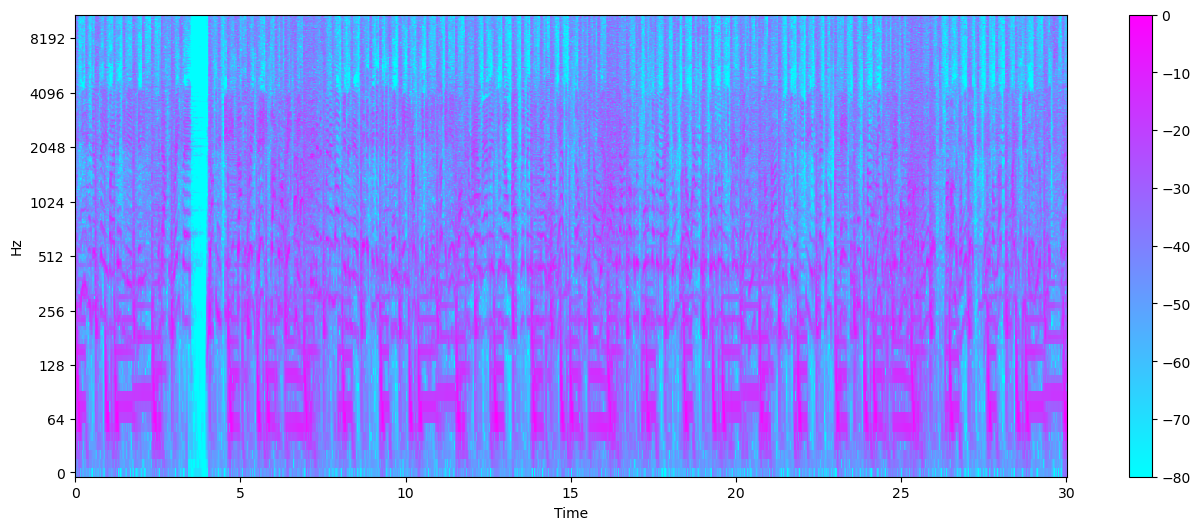

In [59]:
DB = librosa.amplitude_to_db(D, ref = np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = 512 , x_axis = 'time', y_axis = 'log',cmap = 'cool')
plt.colorbar();

# Audio Features

# Zero Crossing Rate:
The rate at which the signal changes from positive to negative or back.

# Tempo BMP (beats per minute)
Dynamic programming beat tracker.

In [15]:
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(f"Zero Crossing Rate = {sum(zero_crossings)}")
tempo, _ = librosa.beat.beat_track(y=y, sr = sr)
print(f'Tempo BMP (beats per minute) = {tempo}')

Zero Crossing Rate = 114127
Tempo BMP (beats per minute) = 103.359375


# Harmonics and Perceptrual:


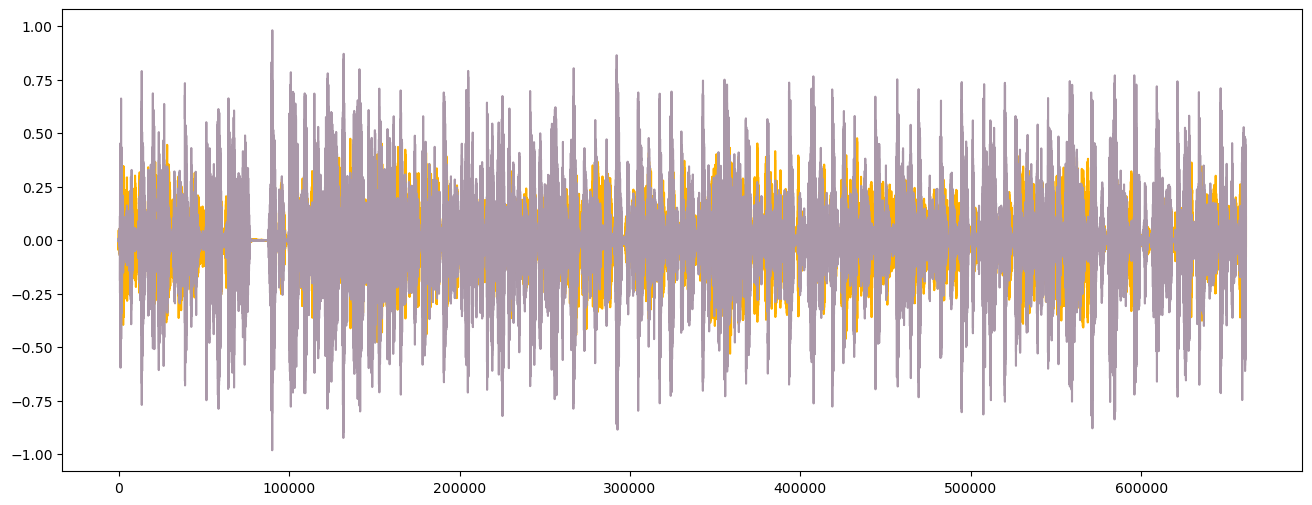

In [40]:
y_harm, y_perc = librosa.effects.hpss(audio_file)
plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#FFB100');
plt.plot(y_perc, color = '#AA98A9');

In [19]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

# Correlation Heatmap for feature means


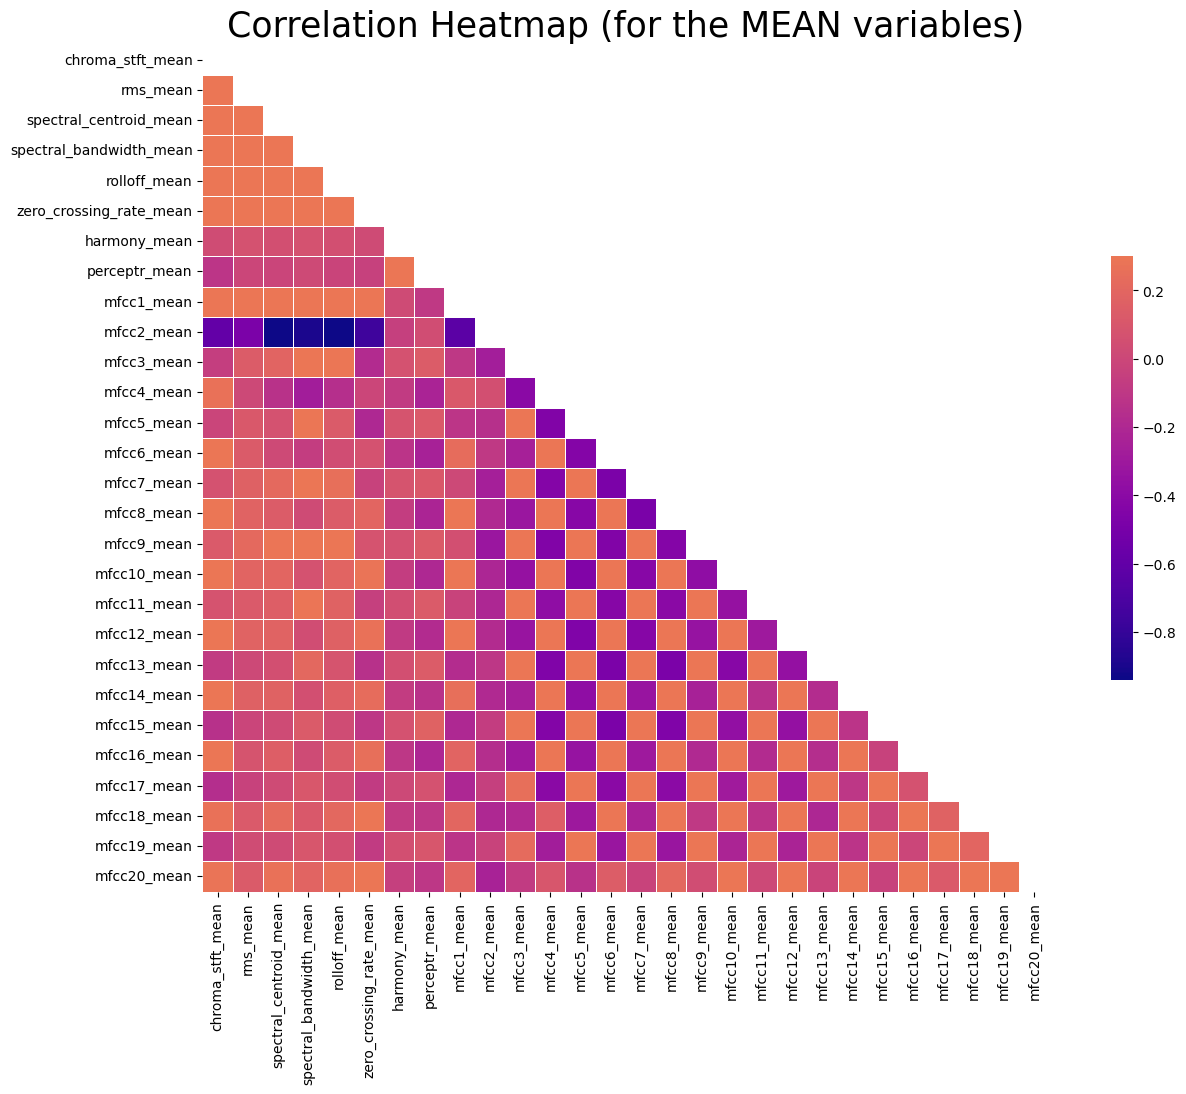

In [20]:
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(16, 11));

cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

sns.heatmap(corr, mask=mask, cmap='plasma', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

# Box Plot for Genres Distributions

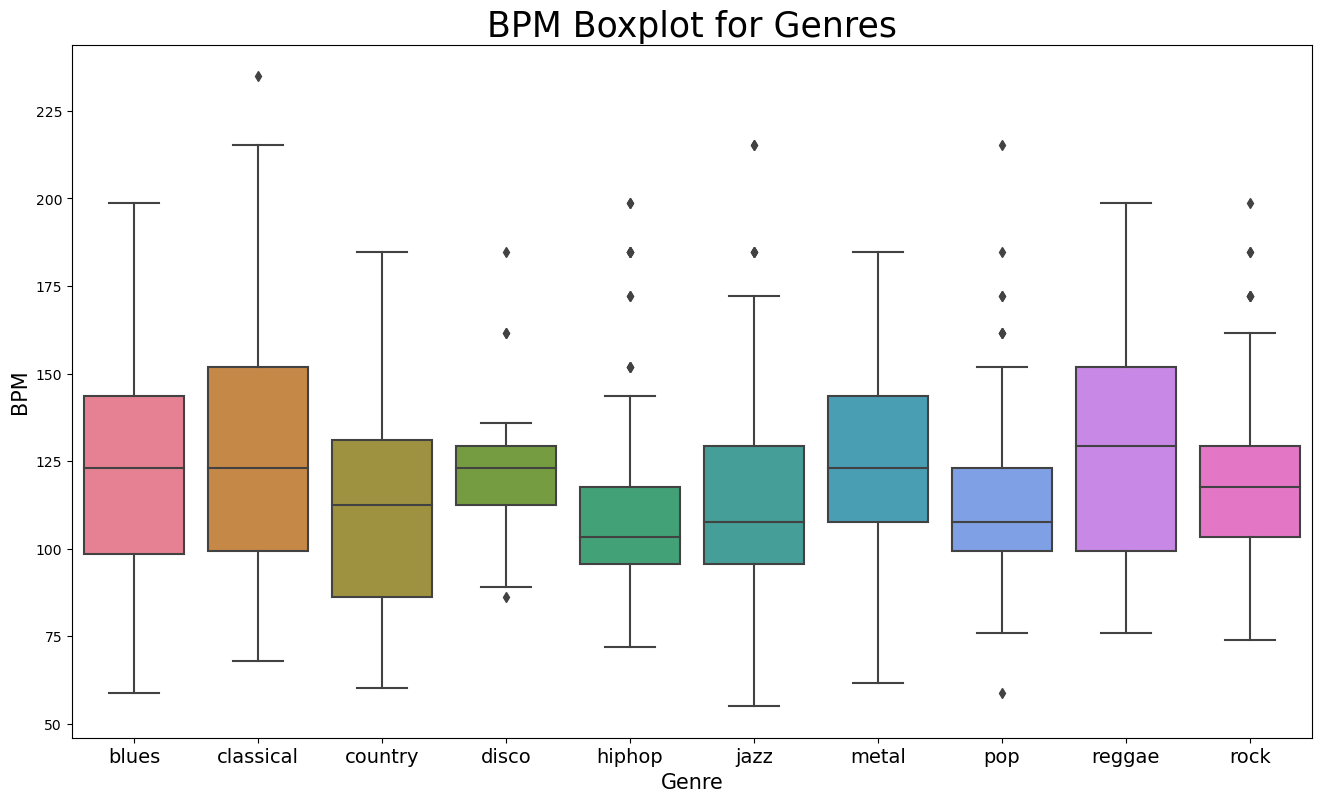

In [21]:
x = data[["label", "tempo"]]


f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

# Principal Component Analysis - to visualize possible groups of genres
1. Normalization
2. PCA
3. The Scatter Plot

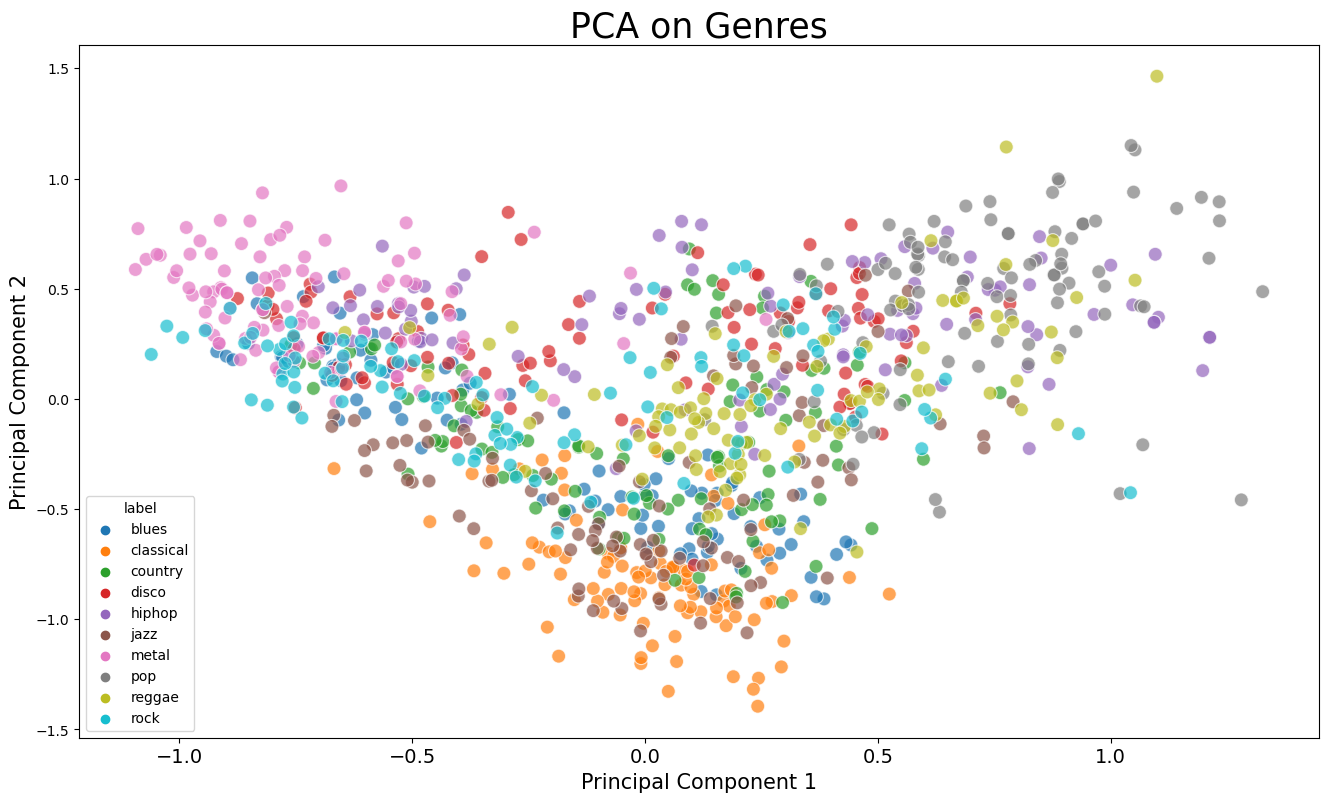

In [22]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)
pca.explained_variance_ratio_

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

# Machine Learning Classification

Using the features_3_sec.csv file, we can try to build a classifier that accurately predicts for any new audio file input it's genre.

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE

In [26]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:,1:] 
data.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

In [27]:
y = data['label']
X = data.loc[:, data.columns != 'label']

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns = cols)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.preprocessing import LabelEncoder

# Encode the string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

def model_assess(model, title="Default"):
    model.fit(X_train, y_train_encoded)  # Use the encoded labels
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test_encoded, preds)
    print('Accuracy', title, ':', round(accuracy * 100, 2), '\n')

In [58]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decision Trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decision Trees")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")


Accuracy Naive Bayes : 52.3 

Accuracy Stochastic Gradient Descent : 65.92 

Accuracy KNN : 83.13 

Accuracy Decision Trees : 65.57 

Accuracy Support Vector Machine : 75.88 

Accuracy Neural Nets : 68.62 

Accuracy Cross Gradient Booster : 91.84 



# XGBoost is the winner - 91.84% accuracy


In [ ]:
# #increasing accuracy of XGB Classifier with hyperparameter optimization for XGB classifier

# from sklearn.preprocessing import LabelEncoder
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# # Encode class labels
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'n_estimators': [1000, 2000, 3000],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# xgb_classifier = XGBClassifier(random_state=42)

# grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train_encoded)

# print("Best Hyperparameters:", grid_search.best_params_)

# best_xgb_model = grid_search.best_estimator_

# y_pred_encoded = best_xgb_model.predict(X_test)

# # Decode the predicted labels back to their original class names
# y_pred = label_encoder.inverse_transform(y_pred_encoded)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy on test set:", accuracy)

Accuracy: 90.32366 



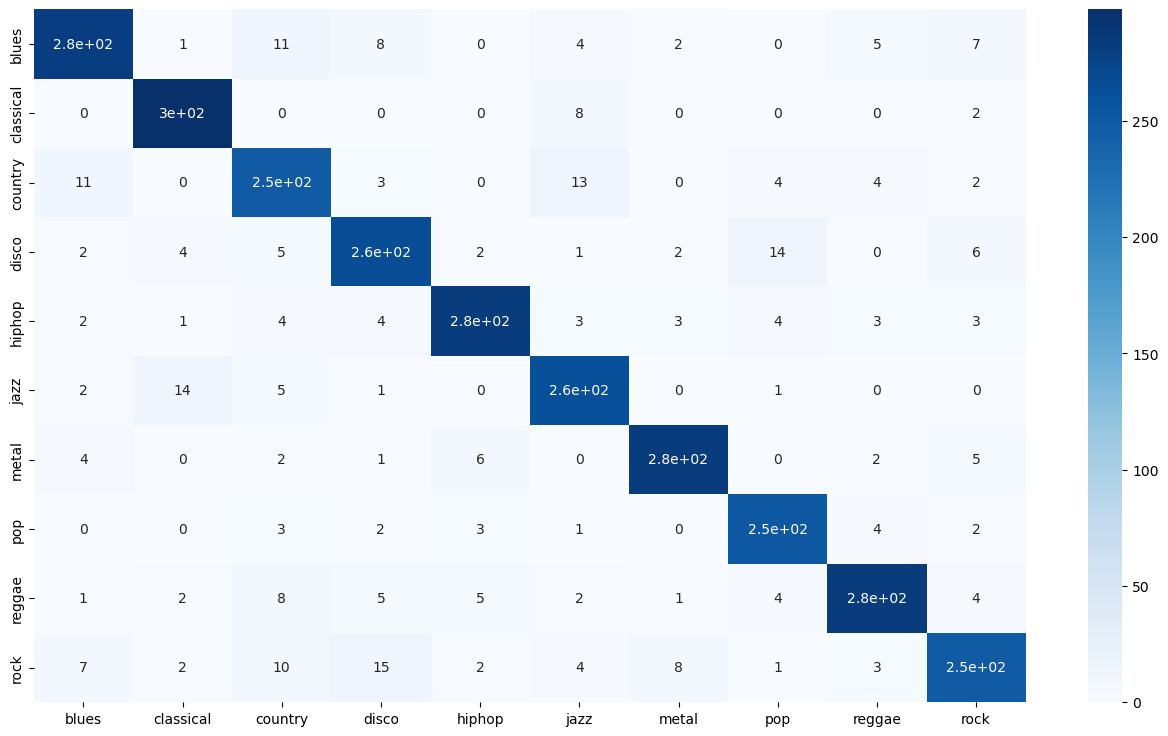

In [94]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# XGBoost Classifier
xgb = XGBClassifier(n_estimators=1500, learning_rate=0.08)
xgb.fit(X_train, y_train_encoded) 
preds = xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, preds)
print('Accuracy:', round(accuracy * 100, 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test_encoded, preds)
plt.figure(figsize=(16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.savefig("conf matrix")

# Recommender Systems


In [42]:
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

In [43]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv', index_col='filename')
labels = data[['label']]
# data.head()
data = data.drop(columns=['length','label'])
data_scaled=preprocessing.scale(data)
data.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
filename                                                                 
blues.00000.wav          0.350088         0.088757  0.130228  0.002827   
blues.00001.wav          0.340914         0.094980  0.095948  0.002373   
blues.00002.wav          0.363637         0.085275  0.175570  0.002746   
blues.00003.wav          0.404785         0.093999  0.141093  0.006346   
blues.00004.wav          0.308526         0.087841  0.091529  0.002303   

                 spectral_centroid_mean  spectral_centroid_var  \
filename                                                         
blues.00000.wav             1784.165850          129774.064525   
blues.00001.wav             1530.176679          375850.073649   
blues.00002.wav             1552.811865          156467.643368   
blues.00003.wav             1070.106615          184355.942417   
blues.00004.wav             1835.004266          343399.939274   

                 spectral_bandwidth_mean  spectral_bandwidth_var  \
filename                                                           
blues.00000.wav              2002.449060            85882.761315   
blues.00001.wav              2039.036516           213843.755497   
blues.00002.wav              1747.702312            76254.192257   
blues.00003.wav              1596.412872           166441.494769   
blues.00004.wav              1748.172116            88445.209036   

                 rolloff_mean   rolloff_var  ...  mfcc16_mean  mfcc16_var  \
filename                                     ...                            
blues.00000.wav   3805.839606  9.015054e+05  ...     0.752740   52.420910   
blues.00001.wav   3550.522098  2.977893e+06  ...     0.927998   55.356403   
blues.00002.wav   3042.260232  7.840345e+05  ...     2.451690   40.598766   
blues.00003.wav   2184.745799  1.493194e+06  ...     0.780874   44.427753   
blues.00004.wav   3579.757627  1.572978e+06  ...    -4.520576   86.099236   

                 mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  \
filename                                                            
blues.00000.wav    -1.690215   36.524071    -0.408979   41.597103   
blues.00001.wav    -0.731125   60.314529     0.295073   48.120598   
blues.00002.wav    -7.729093   47.639427    -1.816407   52.382141   
blues.00003.wav    -3.319597   50.206673     0.636965   37.319130   
blues.00004.wav    -5.454034   75.269707    -0.916874   53.613918   

                 mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  
filename                                                           
blues.00000.wav    -2.303523   55.062923     1.221291   46.936035  
blues.00001.wav    -0.283518   51.106190     0.531217   45.786282  
blues.00002.wav    -3.439720   46.639660    -2.231258   30.573025  
blues.00003.wav    -0.619121   37.259739    -3.407448   31.949339  
blues.00004.wav    -4.404827   62.910812   -11.703234   55.195160  

[5 rows x 57 columns]

# Cosine similarity
Calculates the pairwise cosine similarity for each combination of songs in the data. This results in a 1000 x 1000 matrix (with redundancy in the information as item A similarity to item B == item B similarity to item A).

In [44]:
# Cosine similarity
similarity = cosine_similarity(data_scaled)
print("Similarity shape:", similarity.shape)

sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index
sim_df_names

Similarity shape: (1000, 1000)


filename         blues.00000.wav  blues.00001.wav  blues.00002.wav  \
filename                                                             
blues.00000.wav         1.000000         0.049231         0.589618   
blues.00001.wav         0.049231         1.000000        -0.096834   
blues.00002.wav         0.589618        -0.096834         1.000000   
blues.00003.wav         0.284862         0.520903         0.210411   
blues.00004.wav         0.025561         0.080749         0.400266   
...                          ...              ...              ...   
rock.00095.wav          0.610942        -0.077301         0.495707   
rock.00096.wav          0.640835        -0.222119         0.566837   
rock.00097.wav          0.496294        -0.302573         0.589983   
rock.00098.wav          0.284958         0.499562         0.216378   
rock.00099.wav          0.304098         0.311723         0.321069   

filename         blues.00003.wav  blues.00004.wav  blues.00005.wav  \
filename                                                             
blues.00000.wav         0.284862         0.025561        -0.346688   
blues.00001.wav         0.520903         0.080749         0.307856   
blues.00002.wav         0.210411         0.400266        -0.082019   
blues.00003.wav         1.000000         0.126437         0.134796   
blues.00004.wav         0.126437         1.000000         0.556066   
...                          ...              ...              ...   
rock.00095.wav         -0.000287         0.063454        -0.231012   
rock.00096.wav          0.020515         0.063546        -0.272209   
rock.00097.wav         -0.107821         0.172944        -0.175960   
rock.00098.wav          0.502279         0.153192         0.176351   
rock.00099.wav          0.183210         0.061785         0.052447   

filename         blues.00006.wav  blues.00007.wav  blues.00008.wav  \
filename                                                             
blues.00000.wav        -0.219483        -0.167626         0.641877   
blues.00001.wav         0.318286         0.415258         0.120649   
blues.00002.wav        -0.028061         0.104446         0.468113   
blues.00003.wav         0.300746         0.324566         0.352758   
blues.00004.wav         0.482195         0.623455         0.029703   
...                          ...              ...              ...   
rock.00095.wav         -0.251086        -0.180628         0.619450   
rock.00096.wav         -0.291506        -0.256171         0.612170   
rock.00097.wav         -0.203014        -0.155732         0.461320   
rock.00098.wav          0.252338         0.239441         0.454673   
rock.00099.wav          0.065553         0.068649         0.403862   

filename         blues.00009.wav  ...  rock.00090.wav  rock.00091.wav  \
filename                          ...                                   
blues.00000.wav        -0.097889  ...       -0.082829        0.546169   
blues.00001.wav         0.404168  ...       -0.098111       -0.325126   
blues.00002.wav        -0.132532  ...       -0.032408        0.561074   
blues.00003.wav         0.295184  ...       -0.320107       -0.206516   
blues.00004.wav         0.471657  ...        0.087605        0.017366   
...                          ...  ...             ...             ...   
rock.00095.wav         -0.258421  ...        0.023926        0.843727   
rock.00096.wav         -0.304636  ...       -0.033826        0.871226   
rock.00097.wav         -0.330066  ...       -0.008336        0.914170   
rock.00098.wav          0.229392  ...       -0.233309        0.117855   
rock.00099.wav          0.083416  ...        0.032065        0.330570   

filename         rock.00092.wav  rock.00093.wav  rock.00094.wav  \
filename                                                          
blues.00000.wav        0.578558        0.662590        0.571629   
blues.00001.wav       -0.370792       -0.191698       -0.330834   
blues.00002.wav        0.590779        0.583293  

# Song similarity scoring



In [45]:
def find_similar_songs(name):
    series = sim_df_names[name].sort_values(ascending = False)
    series = series.drop(name)
    print("\n*******\nSimilar Songs For ", name)
    print(series.head())

# pop

In [46]:
find_similar_songs('pop.00023.wav') 

ipd.Audio(f'{general_path}/genres_original/pop/pop.00023.wav')


*******
Similar Songs For  pop.00023.wav
filename
pop.00075.wav    0.875235
pop.00089.wav    0.874246
pop.00088.wav    0.872443
pop.00091.wav    0.871975
pop.00024.wav    0.869849
Name: pop.00023.wav, dtype: float64


In [47]:
ipd.Audio(f'{general_path}/genres_original/pop/pop.00089.wav')

# METAL

In [48]:
find_similar_songs('metal.00002.wav') 

ipd.Audio(f'{general_path}/genres_original/metal/metal.00021.wav')


*******
Similar Songs For  metal.00002.wav
filename
metal.00028.wav    0.904367
metal.00059.wav    0.896096
rock.00018.wav     0.891910
rock.00017.wav     0.886526
rock.00016.wav     0.867508
Name: metal.00002.wav, dtype: float64


In [49]:
ipd.Audio(f'{general_path}/genres_original/metal/metal.00059.wav')